In [26]:
from sklearn import datasets
data_breast_cancer = datasets.load_breast_cancer(as_frame=True)
print(data_breast_cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<AxesSubplot:xlabel='x', ylabel='y'>

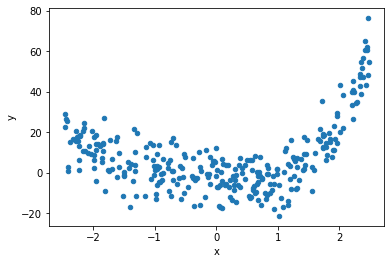

In [27]:
import numpy as np
import pandas as pd
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4 
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')

In [28]:
X_cancer = data_breast_cancer.data[["mean texture", "mean symmetry"]]
X_cancer.head()

,mean texture,mean symmetry
0,10.38,0.2419
1,17.77,0.1812
2,21.25,0.2069
3,20.38,0.2597
4,14.34,0.1809


In [29]:
y_cancer = data_breast_cancer.target
y_cancer.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2)

In [31]:
print(len(X_cancer_train), len(X_cancer_test))

455 114


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
best_train_score = -1
best_test_score = -1
best_x_train = -1
for x in range(1,100):
    tree_clf = DecisionTreeClassifier(max_depth=x)
    #Fitting to cancer_train
    tree_clf.fit(X_cancer_train, y_cancer_train)
    y_pred_train = tree_clf.predict(X_cancer_train)
    train_score = f1_score(y_cancer_train, y_pred_train)
    print(str(x) + "Train score = " + str(train_score))
    #Fitting to cancer test
    tree_clf.fit(X_cancer_test, y_cancer_test)
    y_pred_test = tree_clf.predict(X_cancer_test)
    test_score = f1_score(y_cancer_test, y_pred_test)
    print(str(x) + "Test score = " + str(test_score))
    print("\n")
    #Taking best score
    if(train_score > best_train_score):
        best_x_train = x
        best_train_score = train_score
    if(test_score > best_test_score):
        best_x_test = x
        best_test_score = test_score
        
print(str(best_x_train) + " " + str(best_x_test))

1Train score = 0.7484909456740443
1Test score = 0.7941176470588235


2Train score = 0.8165869218500797
2Test score = 0.8175182481751825


3Train score = 0.7846153846153846
3Test score = 0.8175182481751825


4Train score = 0.8066914498141264
4Test score = 0.8652482269503546


5Train score = 0.8450704225352113
5Test score = 0.8652482269503546


6Train score = 0.8756388415672913
6Test score = 0.8873239436619719


7Train score = 0.8969072164948453
7Test score = 0.8951048951048951


8Train score = 0.9284467713787085
8Test score = 0.9473684210526316


9Train score = 0.9403508771929825
9Test score = 0.9664429530201343


10Train score = 0.9645390070921985
10Test score = 0.9934640522875817


11Train score = 0.9730700179533214
11Test score = 0.9934640522875817


12Train score = 0.9876543209876543
12Test score = 1.0


13Train score = 0.9964285714285714
13Test score = 1.0


14Train score = 0.998211091234347
14Test score = 1.0


15Train score = 1.0
15Test score = 1.0


16Train score = 1.0
16Test sc

In [33]:
from sklearn.tree import export_graphviz

In [34]:
from sklearn.tree import DecisionTreeRegressor
X_df = df.x
y_df = df.y

In [35]:
X_df.head()

0    0.500289
1   -2.242861
2    0.641167
3    1.219392
4    1.172363
Name: x, dtype: float64

In [36]:
y_df.head()

0     6.476999
1    15.446109
2    -9.466178
3    16.114796
4   -15.878689
Name: y, dtype: float64

In [37]:
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size=0.2)

In [38]:
print(len(X_df_train), len(X_df_test))

240 60


In [39]:
from sklearn.metrics import mean_squared_error as mse

best_train_score = -1
best_test_score = -1
best_x_train = -1
for x in range(1,100):
    tree_reg = DecisionTreeRegressor(max_depth=x)
    #Fitting to cancer_train
    tree_reg.fit(X_cancer_train, y_cancer_train)
    y_pred_train = tree_reg.predict(X_cancer_train)
    train_mse = mse(y_cancer_train, y_pred_train)
    print(str(x) + "Train mse = " + str(train_mse))
    #Fitting to cancer test
    tree_reg.fit(X_cancer_test, y_cancer_test)
    y_pred_test = tree_reg.predict(X_cancer_test)
    test_mse = mse(y_cancer_test, y_pred_test)
    print(str(x) + "Test mse = " + str(test_mse))
    print("\n")


1Train mse = 0.18339643549727586
1Test mse = 0.15752709972156892


2Train mse = 0.1650056483154578
2Test mse = 0.14388932643906446


3Train mse = 0.15211704485933675
3Test mse = 0.13816872169274919


4Train mse = 0.14102753286199687
4Test mse = 0.11112210350437496


5Train mse = 0.12439599999097548
5Test mse = 0.1057330827067669


6Train mse = 0.10383243740386598
6Test mse = 0.08951644592376859


7Train mse = 0.08463653167490647
7Test mse = 0.08009387503847339


8Train mse = 0.06179187390819412
8Test mse = 0.0546441862231336


9Train mse = 0.044876774019631166
9Test mse = 0.02882205513784461


10Train mse = 0.031784164553395326
10Test mse = 0.007309941520467838


11Train mse = 0.01752089180660609
11Test mse = 0.0043859649122807015


12Train mse = 0.009848246991104134
12Test mse = 0.0


13Train mse = 0.0038461538461538464
13Test mse = 0.0


14Train mse = 0.001098901098901099
14Test mse = 0.0


15Train mse = 0.0
15Test mse = 0.0


16Train mse = 0.0
16Test mse = 0.0


17Train mse = 0.0
17